<a href="https://colab.research.google.com/github/kiranjangra/Email-Sms-spam/blob/main/spam_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2561,ham,And maybe some pressies,NaN,NaN,NaN
690,ham,Was the farm open?,NaN,NaN,NaN
4813,ham,Ummmmmaah Many many happy returns of d day my ...,NaN,NaN,NaN
5237,spam,Someonone you know is trying to contact you vi...,NaN,NaN,NaN
2656,ham,Feel like trying kadeem again? :V,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.sample(5)

,target,text
3815,ham,How long does it take to get it.
5184,ham,I'm in town now so i'll jus take mrt down later.
2780,ham,Long after I quit. I get on only like 5 minute...
966,ham,I am not sure about night menu. . . I know onl...
1814,ham,HI ITS JESS I DONT KNOW IF YOU ARE AT WORK BUT...


In [ ]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.sample(5)

,target,text
220,0,Ok no prob. Take ur time.
4389,0,Do you know why god created gap between your f...
708,1,To review and KEEP the fantastic Nokia N-Gage ...
1998,0,"Well, I have to leave for my class babe ... Yo..."
4425,0,Was it something u ate?


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.shape

(5169, 2)

In [ ]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

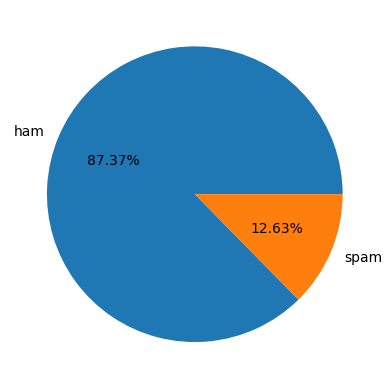

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f%%")
plt.show()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_char']=df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#num of words
df['num_words']=df['text'].apply(lambda x :len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sent']=df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# For ham messages
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

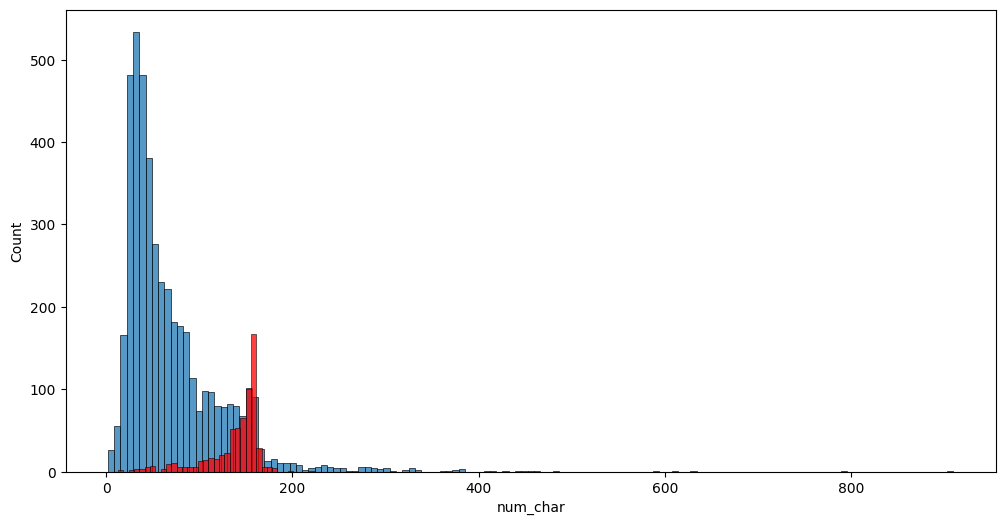

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

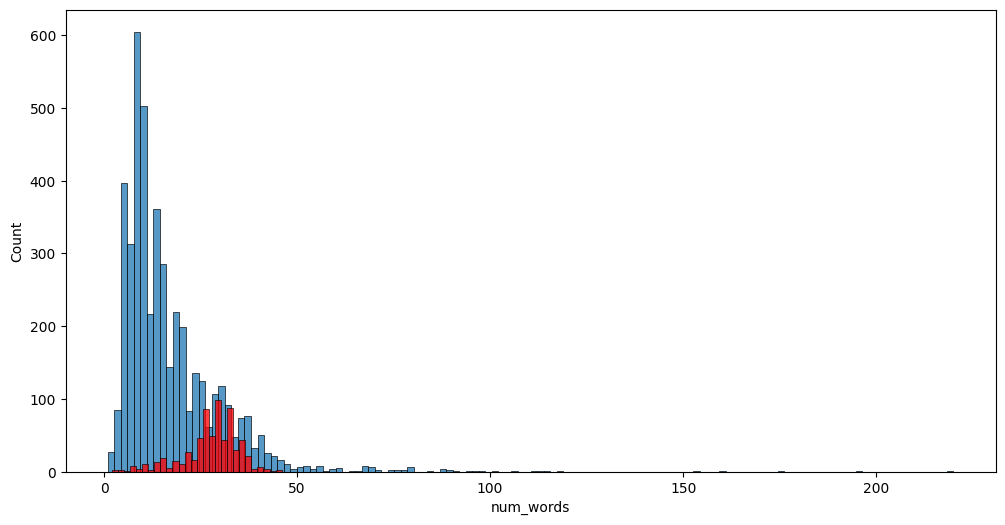

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

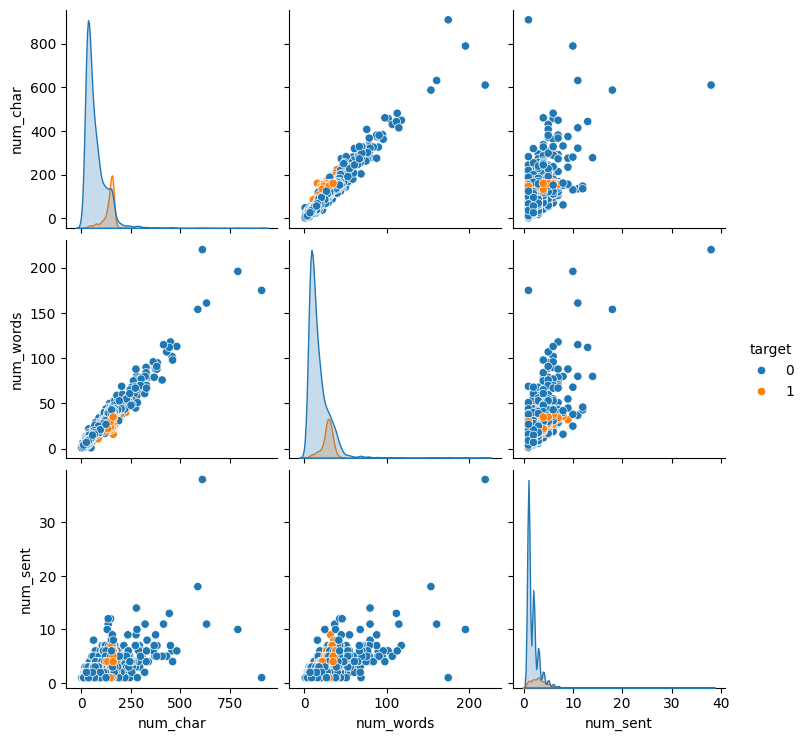

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
df[['num_char','num_words','num_sent']].corr()

,num_char,num_words,num_sent
num_char,1.000000,0.965760,0.624139
num_words,0.965760,1.000000,0.679971
num_sent,0.624139,0.679971,1.000000


<Axes: >

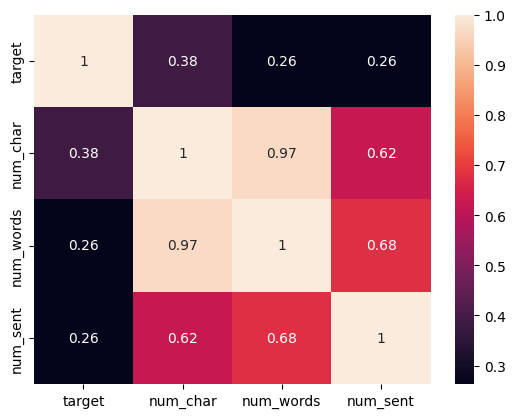

In [ ]:
sns.heatmap(df[['target','num_char','num_words','num_sent']].corr(),annot=True)

In [ ]:
# Data Preprocessing
'''
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming
'''

'\n1. Lower case\n2. Tokenization\n3. Removing special characters\n4. Removing stop words and punctuation\n5. Stemming\n'

In [ ]:
def transform_word(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:] # if this code doen't work at any other source then try test=y[:]
    y.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
         y.append(i)

    text=y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

    return ' '.join(y)



In [ ]:
nltk.download('Stopwords')

[nltk_data] Error loading Stopwords: Package 'Stopwords' not found in
[nltk_data]     index


False

In [ ]:
def main():
    print(transform_word("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."))

if __name__=="__main__":
  main()

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('raining')

'rain'

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df['text'].apply(transform_word)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [ ]:
df['transformed_text']=df['text'].apply(transform_word)

In [ ]:
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=700,height=700,min_font_size=10,background_color='black')

In [ ]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

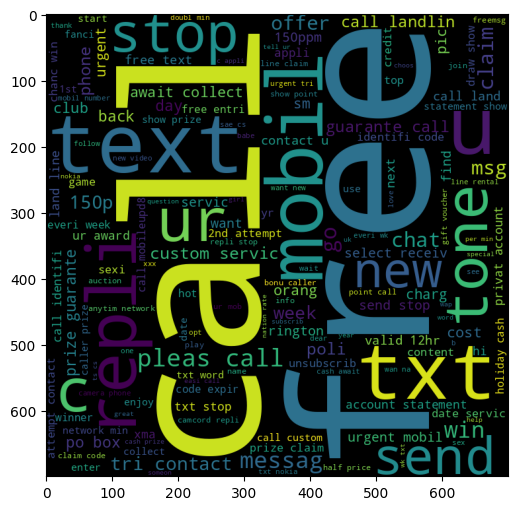

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

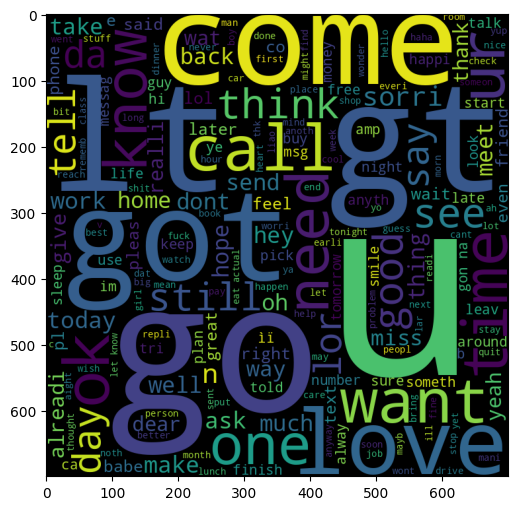

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [ ]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


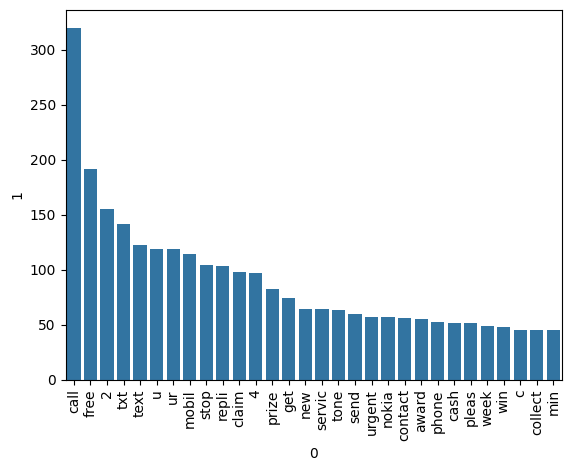

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

In [ ]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


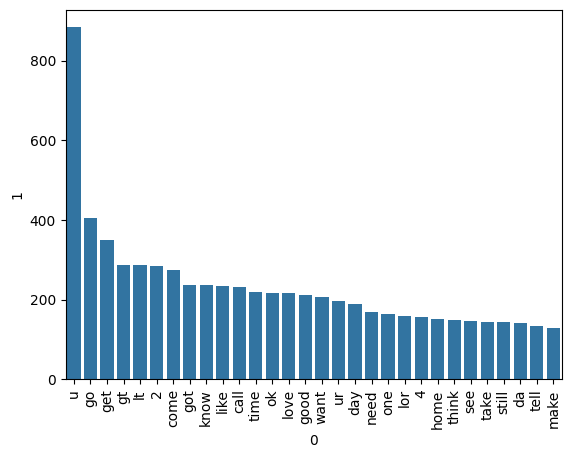

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()
tfidf1=TfidfVectorizer(max_features=3000)

In [ ]:
X=cv.fit_transform(df['transformed_text']).toarray() # we are converting sparse array into dense array

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape  # (5169,6708) 5169 msg and 6708 words

(5169, 6708)

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
X1=tfidf.fit_transform(df['transformed_text']).toarray() # we are converting sparse array into dense array
X2=tfidf1.fit_transform(df['transformed_text']).toarray()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X3=scaler.fit_transform(X2)

In [ ]:
# appendinf a new column
X4=np.hstack((X2,df['num_char'].values.reshape(-1,1)))

In [ ]:
X1.shape
X2.shape
X3.shape

(5169, 3000)

In [ ]:
X4.shape

(5169, 3001)

In [ ]:
y1=df['target'].values
y2=df['target'].values

In [ ]:
# X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=2)
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y1,test_size=0.2,random_state=2)
# X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y1,test_size=0.2,random_state=2)

In [ ]:
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y1,test_size=0.2,random_state=2)

In [ ]:
gnb.fit(X1_train,y1_train)
y1_pred1=gnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred1))
print(confusion_matrix(y1_test,y1_pred1))
print(precision_score(y1_test,y1_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:
gnb.fit(X2_train,y2_train)
y2_pred1=gnb.predict(X2_test)
print(accuracy_score(y2_test,y2_pred1))
print(confusion_matrix(y2_test,y2_pred1))
print(precision_score(y2_test,y2_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [ ]:
gnb.fit(X3_train,y3_train)
y3_pred1=gnb.predict(X3_test)
print(accuracy_score(y3_test,y3_pred1))
print(confusion_matrix(y3_test,y3_pred1))
print(precision_score(y3_test,y3_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [ ]:
gnb.fit(X4_train,y4_train)
y4_pred1=gnb.predict(X4_test)
print(accuracy_score(y4_test,y4_pred1))
print(confusion_matrix(y4_test,y4_pred1))
print(precision_score(y4_test,y4_pred1))

0.8907156673114119
[[807  89]
 [ 24 114]]
0.5615763546798029


In [ ]:
mnb.fit(X1_train,y1_train)
y1_pred2=mnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred2))
print(confusion_matrix(y1_test,y1_pred2))
print(precision_score(y1_test,y1_pred2))

NameError: name 'mnb' is not defined

In [ ]:
mnb.fit(X2_train,y2_train)
y2_pred2=mnb.predict(X2_test)
print(accuracy_score(y2_test,y2_pred2))
print(confusion_matrix(y2_test,y2_pred2))
print(precision_score(y2_test,y2_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
mnb.fit(X3_train,y3_train)
y3_pred2=mnb.predict(X3_test)
print(accuracy_score(y3_test,y3_pred2))
print(confusion_matrix(y3_test,y3_pred2))
print(precision_score(y3_test,y3_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [ ]:
mnb.fit(X4_train,y4_train)
y4_pred2=mnb.predict(X4_test)
print(accuracy_score(y4_test,y4_pred2))
print(confusion_matrix(y4_test,y4_pred2))
print(precision_score(y4_test,y4_pred2))

0.9410058027079303
[[896   0]
 [ 61  77]]
1.0


In [ ]:
bnb.fit(X1_train,y1_train)
y1_pred3=bnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred3))
print(confusion_matrix(y1_test,y1_pred3))
print(precision_score(y1_test,y1_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
bnb.fit(X2_train,y2_train)
y2_pred3=bnb.predict(X2_test)
print(accuracy_score(y2_test,y2_pred3))
print(confusion_matrix(y2_test,y2_pred3))
print(precision_score(y2_test,y2_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
bnb.fit(X3_train,y3_train)
y3_pred3=bnb.predict(X3_test)
print(accuracy_score(y3_test,y3_pred3))
print(confusion_matrix(y3_test,y3_pred3))
print(precision_score(y3_test,y3_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
bnb.fit(X4_train,y4_train)
y4_pred3=bnb.predict(X4_test)
print(accuracy_score(y4_test,y4_pred3))
print(confusion_matrix(y4_test,y4_pred3))
print(precision_score(y4_test,y4_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [ ]:
# tfidf --> mnb due to precision score value
# Precision Score: It calculates the ratio of true positive predictions to the total number of positive predictions made
# True positives are the cases where the model correctly predicts the positive class (actual class is positive, and the model predicts it as positive.)
# because here precision score is 1 that means its predict all positive class as positive,
# no false positive means ( actual class is negtive, but the model predicts it as positive.)

In [ ]:
# comparing all other model with multinomial naive bayes

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs={
    'SVC' : svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb

}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
train_classifier(svc,X1_train,y1_train,X1_test,y1_test)

(0.9729206963249516, 0.9741379310344828)

In [ ]:
train_classifier(svc,X2_train,y2_train,X2_test,y2_test)

(0.9690522243713733, 0.9274193548387096)

In [ ]:
train_classifier(svc,X3_train,y3_train,X3_test,y3_test)

(0.9690522243713733, 0.9274193548387096)

In [ ]:
#train_classifier(svc,X4_train,y4_train,y4_test,y4_test)

In [ ]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X1_train,y1_train,X1_test,y1_test)

  print("For ",name)
  print(f"Accuracy - {current_accuracy}")
  print(f"Precision - {current_precision}")

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy - 0.9729206963249516
Precision - 0.9741379310344828
For  KN
Accuracy - 0.9003868471953579
Precision - 1.0
For  NB
Accuracy - 0.9593810444874274
Precision - 1.0
For  DT
Accuracy - 0.9352030947775629
Precision - 0.8380952380952381
For  LR
Accuracy - 0.9516441005802708
Precision - 0.94
For  RF
Accuracy - 0.971953578336557
Precision - 1.0
For  AdaBoost
Accuracy - 0.9613152804642167
Precision - 0.9454545454545454
For  BgC
Accuracy - 0.9584139264990329
Precision - 0.8625954198473282
For  ETC
Accuracy - 0.9729206963249516
Precision - 0.9824561403508771
For  GBDT
Accuracy - 0.9526112185686654
Precision - 0.9238095238095239
For  xgb
Accuracy - 0.9729206963249516
Precision - 0.9435483870967742


In [ ]:
accuracy_scores1=[]
precision_scores1=[]

for name,clf in clfs.items():
  current_accuracy1,current_precision1=train_classifier(clf,X2_train,y2_train,X2_test,y2_test)

  print("For ",name)
  print(f"Accuracy - {current_accuracy1}")
  print(f"Precision - {current_precision1}")

  accuracy_scores1.append(current_accuracy1)
  precision_scores1.append(current_precision1)

For  SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
For  KN
Accuracy - 0.9052224371373307
Precision - 1.0
For  NB
Accuracy - 0.9709864603481625
Precision - 1.0
For  DT
Accuracy - 0.9294003868471954
Precision - 0.8282828282828283
For  LR
Accuracy - 0.9584139264990329
Precision - 0.9702970297029703
For  RF
Accuracy - 0.9758220502901354
Precision - 0.9829059829059829
For  AdaBoost
Accuracy - 0.960348162475822
Precision - 0.9292035398230089
For  BgC
Accuracy - 0.9584139264990329
Precision - 0.8682170542635659
For  ETC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
For  GBDT
Accuracy - 0.9468085106382979
Precision - 0.9191919191919192
For  xgb
Accuracy - 0.9671179883945842
Precision - 0.9262295081967213


In [ ]:
accuracy_scores2=[]
precision_scores2=[]

for name,clf in clfs.items():
  current_accuracy2,current_precision2=train_classifier(clf,X3_train,y3_train,X3_test,y3_test)

  print("For ",name)
  print(f"Accuracy - {current_accuracy2}")
  print(f"Precision - {current_precision2}")

  accuracy_scores2.append(current_accuracy2)
  precision_scores2.append(current_precision2)

For  SVC
Accuracy - 0.9690522243713733
Precision - 0.9274193548387096
For  KN
Accuracy - 0.9052224371373307
Precision - 0.9761904761904762
For  NB
Accuracy - 0.9787234042553191
Precision - 0.9461538461538461
For  DT
Accuracy - 0.9323017408123792
Precision - 0.8333333333333334
For  LR
Accuracy - 0.9671179883945842
Precision - 0.9642857142857143
For  RF
Accuracy - 0.9758220502901354
Precision - 0.9829059829059829
For  AdaBoost
Accuracy - 0.960348162475822
Precision - 0.9292035398230089
For  BgC
Accuracy - 0.9584139264990329
Precision - 0.8682170542635659
For  ETC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
For  GBDT
Accuracy - 0.9468085106382979
Precision - 0.9191919191919192
For  xgb
Accuracy - 0.9671179883945842
Precision - 0.9262295081967213


In [ ]:
accuracy_scores3=[]
precision_scores3=[]

for name,clf in clfs.items():
  current_accuracy3,current_precision3=train_classifier(clf,X4_train,y4_train,X4_test,y4_test)

  print("For ",name)
  print(f"Accuracy - {current_accuracy3}")
  print(f"Precision - {current_precision3}")

  accuracy_scores3.append(current_accuracy3)
  precision_scores3.append(current_precision3)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy - 0.8665377176015474
Precision - 0.0
For  KN
Accuracy - 0.9323017408123792
Precision - 0.8148148148148148
For  NB
Accuracy - 0.9410058027079303
Precision - 1.0
For  DT
Accuracy - 0.9448742746615088
Precision - 0.8857142857142857
For  LR
Accuracy - 0.9613152804642167
Precision - 0.9622641509433962
For  RF
Accuracy - 0.9690522243713733
Precision - 0.9818181818181818
For  AdaBoost
Accuracy - 0.9642166344294004
Precision - 0.9316239316239316
For  BgC
Accuracy - 0.9661508704061895
Precision - 0.8992248062015504
For  ETC
Accuracy - 0.9787234042553191
Precision - 0.9754098360655737
For  GBDT
Accuracy - 0.9516441005802708
Precision - 0.9313725490196079
For  xgb
Accuracy - 0.9690522243713733
Precision - 0.9416666666666667


In [ ]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df1=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_30000':accuracy_scores1,'Precision_max_ft_30000':precision_scores1}).sort_values('Precision_max_ft_30000',ascending=False)

In [ ]:
performance_df2=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores2,'Precision_scaling':precision_scores2}).sort_values('Precision_scaling',ascending=False)

In [ ]:
performance_df3=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_new_col_add':accuracy_scores3,'Precision_new_col_add':precision_scores3}).sort_values('Precision_new_col_add',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [ ]:
performance_df1

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [ ]:
performance_df_melt=pd.melt(performance_df,id_vars='Algorithm')

In [ ]:
performance_df_melt

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


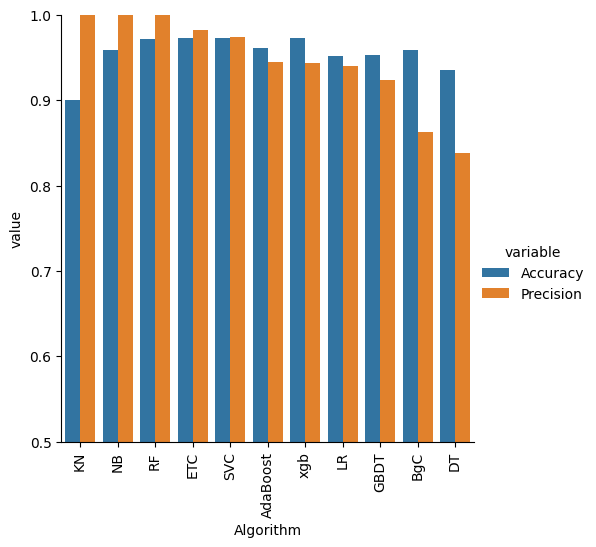

In [ ]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Model Improvement
# 1. Change the max_features parameter of tfidf

In [ ]:
merged_df=performance_df.merge(performance_df1,on='Algorithm')

In [ ]:
new_merged_df=merged_df.merge(performance_df2,on='Algorithm')

In [ ]:
new_merged_df.merge(performance_df3,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_30000,Precision_max_ft_30000,Accuracy_scaling,Precision_scaling,Accuracy_new_col_add,Precision_new_col_add
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190,0.932302,0.814815
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154,0.941006,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.969052,0.981818
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.978723,0.975410
4,SVC,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419,0.866538,0.000000
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624
6,xgb,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230,0.969052,0.941667
7,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286,0.961315,0.962264
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.951644,0.931373
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.966151,0.899225


In [ ]:
# Voting Classifier
nb=MultinomialNB()
rf=RandomForestClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting=VotingClassifier(estimators=[('nb',nb),('rf',rf),('etc',etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_predict=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_predict))
print("Precision",precision_score(y_test,y_predict))

Accuracy 0.9816247582205029
Precision 0.983739837398374


In [ ]:
voting.fit(X1_train,y1_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y1_predict=voting.predict(X1_test)
print("Accuracy",accuracy_score(y1_test,y1_predict))
print("Precision",precision_score(y1_test,y1_predict))

Accuracy 0.971953578336557
Precision 1.0


In [ ]:
# Applying stacking
estimators=[('nb',nb),('rf',rf),('etc',etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(X1_train,y1_train)
y1_predict_st=clf.predict(X1_test)
print("Accuracy",accuracy_score(y1_test,y1_predict_st))
print("Precision",precision_score(y1_test,y1_predict_st))

Accuracy 0.9758220502901354
Precision 0.9185185185185185


In [ ]:
clf.fit(X_train,y_train)
y_predict_st=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_predict_st))
print("Precision",precision_score(y_test,y_predict_st))

Accuracy 0.9816247582205029
Precision 0.983739837398374


In [ ]:
rfc.fit(X_train,y_train)
y_predict=rfc.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_predict))
print("Precision",precision_score(y_test,y_predict))

Accuracy 0.971953578336557
Precision 1.0


In [ ]:
import pickle
pickle.dump(tfidf1,open('vectorizer1.pkl','wb'))
pickle.dump(mnb,open('model1.pkl','wb'))